### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('DS3_C6_S1_Regression_StoreSales_Data_Project.csv')
df=data
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Number of rows and columns

In [3]:
data.shape

(14204, 12)

###  Names of all the columns

In [4]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Checking if there are null values in any columns

In [5]:
df.isnull().sum()  

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df=df.drop('Item_Identifier',axis=1)
df['Item_Fat_Content'] = label_encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = label_encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = label_encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = label_encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = label_encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = label_encoder.fit_transform(df['Outlet_Type'])

df.dtypes

Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

In [8]:
xtest=df[df.Item_Outlet_Sales.isnull()]
xtest=xtest.dropna(axis=1)
xtest

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8523,20.750,0,0.007565,13,107.8622,9,1999,1,0,1
8524,8.300,1,0.038428,4,87.3198,2,2007,2,1,1
8525,14.600,0,0.099575,11,241.7538,0,1998,1,2,0
8526,7.315,0,0.015388,13,155.0340,2,2007,2,1,1
8527,13.600,1,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...
14199,10.500,1,0.013496,13,141.3154,8,1997,2,0,1
14200,7.600,1,0.142991,15,169.1448,3,2009,1,2,2
14201,10.000,0,0.073529,8,118.7440,7,2002,2,1,1
14202,15.300,1,0.064709,3,214.6218,2,2007,2,1,1


In [9]:
df=df.dropna(axis=0)
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

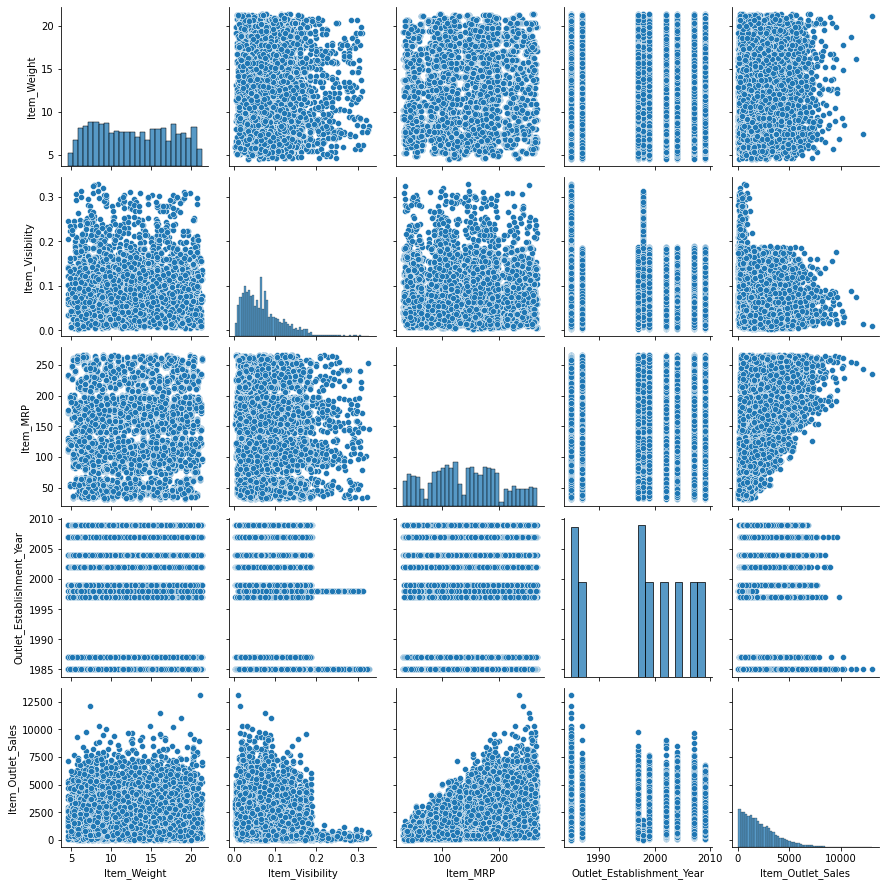

In [10]:
sns.pairplot(data)

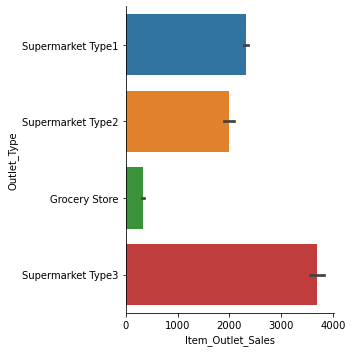

In [11]:
sns.catplot(data=data.dropna(axis=0),x='Item_Outlet_Sales',y='Outlet_Type',kind='bar')

#### interpretation

Supermart type 3 has maximum sales in comparision with Supermart type 1, Supermart type 2 and grocery store

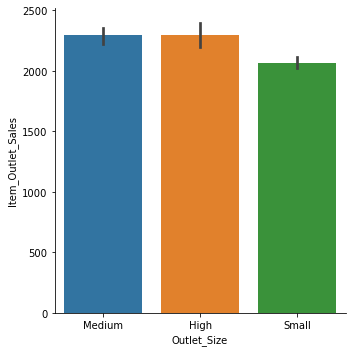

In [12]:
sns.catplot(data=data.dropna(axis=0),y='Item_Outlet_Sales',x='Outlet_Size',kind='bar')

#### interpretation

High and Medium outlet size has more sales with respect to small outlet size

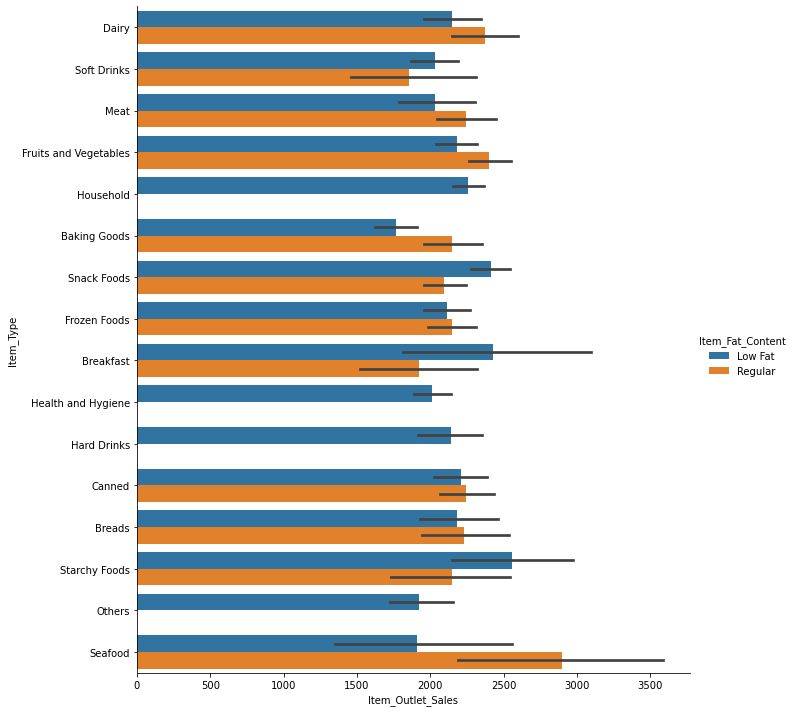

In [13]:
sns.catplot(data=data.dropna(axis=0),x='Item_Outlet_Sales',y='Item_Type',hue='Item_Fat_Content',kind='bar',height=10)

#### interpretation

In regular fat contain Seafood and in low fat contain Starchy Foods has maximum sales

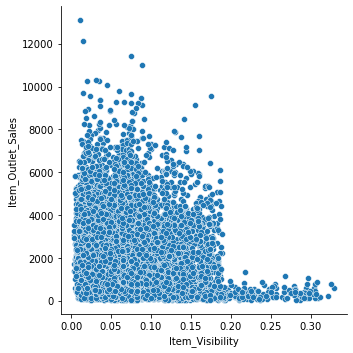

In [14]:
sns.relplot(data=data.dropna(axis=0),y='Item_Outlet_Sales',x='Item_Visibility')

#### interpretation

Here Item visibility in range 0 to 0.2 has more sales

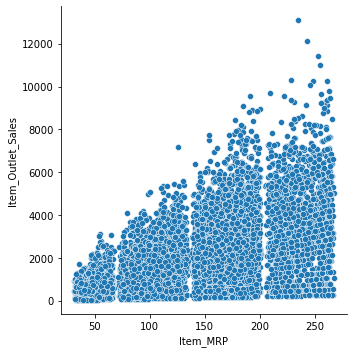

In [15]:
sns.relplot(data=data.dropna(axis=0),y='Item_Outlet_Sales',x='Item_MRP')

#### interpretation

With Increase in MRP the sales is also increasing

### Correlation

<AxesSubplot:>

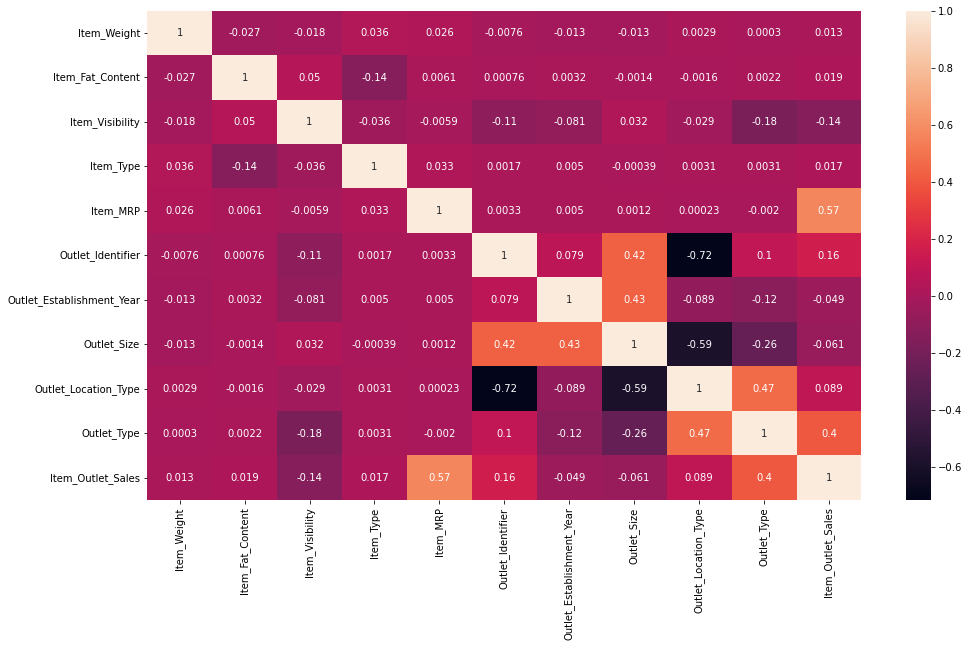

In [16]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True,)

#### interpretation

With respect to Item_outlet_Sales Item MRP and Outlet Type has mpore influence on the sales

### Data Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

x=df.iloc[:,:10]
y=df.iloc[:,[10]]

ss=StandardScaler()

xtests=ss.fit_transform(xtest)
xs=ss.fit_transform(x)
xs

array([[-0.76924555, -0.73814723, -1.11635651, ..., -0.57511938,
        -1.36933384, -0.25265831],
       [-1.49681258,  1.35474328, -1.05009228, ..., -0.57511938,
         1.09156913,  1.00297245],
       [ 0.9958579 , -0.73814723, -1.10173792, ..., -0.57511938,
        -1.36933384, -0.25265831],
       ...,
       [-0.48941207, -0.73814723, -0.72382713, ...,  0.90532233,
        -0.13888236, -0.25265831],
       [-1.21913167,  1.35474328,  1.53291528, ..., -0.57511938,
         1.09156913,  1.00297245],
       [ 0.4146653 , -0.73814723, -0.52504954, ...,  0.90532233,
        -1.36933384, -0.25265831]])

### Modelling

#### LinearRegression

In [18]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split as tts

In [19]:
xtrain,xval,ytrain,yval=tts(xs,y,test_size=20,random_state=777)

In [20]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

lr_pred = lr.predict(xval)
lr1_pred = lr.predict(xtrain)

print('LinearReggression: Training accuracy:',lr.score(xval,yval))

LinearReggression: Training accuracy: 0.5725810482520632


In [21]:
print('Intercept:',lr.intercept_)
print('Slope:',lr.coef_)

Intercept: [2179.67620533]
Slope: [[ -2.87083151  29.43432964 -91.85526695  -4.13168223 967.10786208
  154.81951296 -20.49781861 -23.92926468 -74.41382041 680.38434847]]


In [22]:
d=pd.DataFrame(lr.coef_,columns=x.columns,index=['Coefficient'])
d1=d.T
d1.sort_values(by='Coefficient',ascending=False)

,Coefficient
Item_MRP,967.107862
Outlet_Type,680.384348
Outlet_Identifier,154.819513
Item_Fat_Content,29.434330
Item_Weight,-2.870832
Item_Type,-4.131682
Outlet_Establishment_Year,-20.497819
Outlet_Size,-23.929265
Outlet_Location_Type,-74.413820
Item_Visibility,-91.855267


#### Ridge

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
for i in range(1,51,5):
    scores = cross_val_score(Ridge(alpha=i), xtrain, ytrain, scoring = 'r2', cv= 5)
    print('For alpha {} Ridge model accuracy: {}'.format(i,np.mean(scores)))

For alpha 1 Ridge model accuracy: 0.49996122434494195
For alpha 6 Ridge model accuracy: 0.49996258216094186
For alpha 11 Ridge model accuracy: 0.49996319455445687
For alpha 16 Ridge model accuracy: 0.4999630757122812
For alpha 21 Ridge model accuracy: 0.499962239226026
For alpha 26 Ridge model accuracy: 0.4999606981236499
For alpha 31 Ridge model accuracy: 0.4999584648991002
For alpha 36 Ridge model accuracy: 0.4999555515401898
For alpha 41 Ridge model accuracy: 0.49995196955482923
For alpha 46 Ridge model accuracy: 0.49994772999571724


In [25]:
r=Ridge(alpha=11)
r.fit(xtrain,ytrain)

r_pred = r.predict(xval)
r1_pred = r.predict(xtrain)

print('Ridge: Test accuracy:',r.score(xval,yval))

Ridge: Test accuracy: 0.5722968986349617


In [26]:
print('Intercept:',r.intercept_)
print('Slope:',r.coef_)

Intercept: [2179.67643284]
Slope: [[ -2.83123799  29.42204865 -91.91403129  -4.09284647 965.84574843
  156.44968749 -20.79201757 -23.57460233 -71.97335279 678.2459645 ]]


In [27]:
d=pd.DataFrame(r.coef_,columns=x.columns,index=['Coefficient'])
d1=d.T
d1.sort_values(by='Coefficient',ascending=False)

,Coefficient
Item_MRP,965.845748
Outlet_Type,678.245965
Outlet_Identifier,156.449687
Item_Fat_Content,29.422049
Item_Weight,-2.831238
Item_Type,-4.092846
Outlet_Establishment_Year,-20.792018
Outlet_Size,-23.574602
Outlet_Location_Type,-71.973353
Item_Visibility,-91.914031


#### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
from sklearn.model_selection import GridSearchCV

params={'max_depth':list(range(2,len(x.columns)))}
grid_scearch_r=GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=params)

grid_scearch_r.fit(xtrain,ytrain)

print(grid_scearch_r.best_estimator_)
print('DecisionTreeRegressor: Testing accuracy:',grid_scearch_r.score(xval,yval))

DecisionTreeRegressor(max_depth=5)
DecisionTreeRegressor: Testing accuracy: 0.7001193994114098


In [30]:
from sklearn.inspection import permutation_importance

y_dtr=grid_scearch_r.predict(xval)
y1_dtr=grid_scearch_r.predict(xtrain)

imp_dtr=permutation_importance(grid_scearch_r,xval,y_dtr)
imp_dtr=pd.DataFrame({'Importance':imp_dtr.importances_mean,'Feature':x.columns})
display(imp_dtr.sort_values(by='Importance',ascending=False)[:3])

,Importance,Feature
4,1.245160,Item_MRP
9,0.541046,Outlet_Type
6,0.033581,Outlet_Establishment_Year


#### RandomForestRegressor(Bagging)

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
params={'max_depth':list(range(2,len(x.columns))),'n_estimators':list(range(5,11))}

grid_scearch_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params,scoring='r2')
grid_scearch_rf.fit(xtrain,ytrain)

print(grid_scearch_rf.best_estimator_)
print('RandomForestRegressor: Test accuracy:',grid_scearch_rf.score(xval,yval))

RandomForestRegressor(max_depth=5, n_estimators=5)
RandomForestRegressor: Test accuracy: 0.6820558644436813


In [33]:
y_rf=grid_scearch_rf.predict(xval)
y1_rf=grid_scearch_rf.predict(xtrain)

imp_rf=permutation_importance(grid_scearch_rf,xval,y_rf)
imp_rf=pd.DataFrame({'Importance':imp_rf.importances_mean,'Feature':x.columns})
display(imp_rf.sort_values(by='Importance',ascending=False))

,Importance,Feature
4,1.210752,Item_MRP
9,0.633115,Outlet_Type
6,0.007697,Outlet_Establishment_Year
2,0.003516,Item_Visibility
0,0.001903,Item_Weight
3,0.000003,Item_Type
5,0.000002,Outlet_Identifier
1,0.000000,Item_Fat_Content
7,0.000000,Outlet_Size
8,0.000000,Outlet_Location_Type


#### Boosting

In [34]:
from sklearn.ensemble import AdaBoostRegressor

In [35]:
ab=AdaBoostRegressor(n_estimators=10,random_state=777)
ab.fit(xtrain,ytrain)
print('AdaBoostRegressor: Training accuracy:',ab.score(xval,yval))

AdaBoostRegressor: Training accuracy: 0.6911426029651717


In [36]:
y1_ab=ab.predict(xtrain)
y_ab=ab.predict(xval)

imp_ad=permutation_importance(ab,xval,y_ab)
imp_ad=pd.DataFrame({'Feature':x.columns,'Importance':imp_ad.importances_mean})
display(imp_ad.sort_values(by='Importance',ascending=False))

,Feature,Importance
4,Item_MRP,1.395079
9,Outlet_Type,0.579459
5,Outlet_Identifier,0.002602
2,Item_Visibility,0.000798
8,Outlet_Location_Type,0.000758
6,Outlet_Establishment_Year,0.000344
0,Item_Weight,0.000000
1,Item_Fat_Content,0.000000
3,Item_Type,0.000000
7,Outlet_Size,0.000000


#### Stacking

In [37]:
train_prediction = {
    'LR': lr1_pred.flatten(),
    'Ridge': r1_pred.flatten(),
    'RandomForest': y1_rf,
    'Decision Tree' : y1_dtr,
    'AdaBoost' : y1_ab
}

train_prediction = pd.DataFrame(train_prediction)
train_prediction

,LR,Ridge,RandomForest,Decision Tree,AdaBoost
0,1332.548896,1332.691787,366.666852,341.653051,386.260693
1,1029.454622,1030.657333,839.251024,705.694102,942.604664
2,1064.228242,1065.567727,1524.177650,1528.696820,1766.599646
3,3996.963254,3994.859573,3970.610727,3995.665116,4022.990433
4,2918.702802,2917.919278,3626.457098,3934.071588,4026.944937
...,...,...,...,...,...
8498,1782.058543,1783.434927,2020.781470,2004.089433,2324.203116
8499,591.988635,595.158206,671.708851,705.694102,942.604664
8500,994.678406,997.970153,839.251024,1107.703705,942.604664
8501,1771.707679,1771.898622,1524.177650,1528.696820,1766.599646


In [38]:
smodel = LinearRegression()
smodel.fit(train_prediction, ytrain)

print('Training Score :',smodel.score(train_prediction, ytrain))

Training Score : 0.6072355380223194


In [39]:
test_prediction = {
    'LR': lr_pred.flatten(),
    'Ridge': r_pred.flatten(),
    'RandomForest': y_rf,
    'Decision Tree' : y_dtr,
    'AdaBoost' : y_ab
}

test_prediction = pd.DataFrame(test_prediction)
test_prediction

,LR,Ridge,RandomForest,Decision Tree,AdaBoost
0,5409.254482,5405.383157,6031.708364,6277.689492,6217.981790
1,3612.774030,3610.101159,3823.346771,3934.071588,3889.429193
2,1807.675713,1807.649293,1932.913599,2004.089433,1813.367616
3,2142.448381,2142.781142,1098.916465,1084.083594,1571.408325
4,967.205034,968.791159,1524.177650,1528.696820,1495.315040
5,4150.053660,4147.914306,3970.610727,3995.665116,4022.990433
6,4575.832179,4573.049857,5349.765142,5332.264162,5117.283862
7,1150.340655,1153.299858,1377.039104,1107.703705,1342.113498
8,727.449340,728.494213,259.934144,250.403219,1193.396905
9,1900.850032,1900.733120,2020.781470,2004.089433,1813.367616


In [40]:
final_prediction = smodel.predict(test_prediction) 
print('Test Score :',smodel.score(test_prediction, yval))

Test Score : 0.6909207228382075


### Comparision

In [41]:
tes=dict()
tes['LinearRegression']=round(lr.score(xval,yval),3)
tes['Ridge']=round(r.score(xval,yval),3)
tes['DecisionTreeRegressor']=round(grid_scearch_r.score(xval,yval),3)
tes['RandomForestRegressor']=round(grid_scearch_rf.score(xval,yval),3)
tes['AdaBoostRegressor']=round(ab.score(xval,yval),3)
tes['Stacking']=round(smodel.score(test_prediction, yval),3)
tes

tes=pd.DataFrame(tes,index=['Accuracy'])
tes.T

,Accuracy
LinearRegression,0.573
Ridge,0.572
DecisionTreeRegressor,0.700
RandomForestRegressor,0.682
AdaBoostRegressor,0.691
Stacking,0.691


As we can see *DecisionTreeRegressor* works best in this case 

### Pridicting missing *Item_Outlet_Sales* values with  DecisionTreeRegressor model

In [42]:
y_dtr=grid_scearch_r.predict(xtests)
y_dtr

xtest['Item_Outlet_Sales']=y_dtr

xtest

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,20.750,0,0.007565,13,107.8622,9,1999,1,0,1,1528.696820
8524,8.300,1,0.038428,4,87.3198,2,2007,2,1,1,1528.696820
8525,14.600,0,0.099575,11,241.7538,0,1998,1,2,0,594.764262
8526,7.315,0,0.015388,13,155.0340,2,2007,2,1,1,2524.073910
8527,13.600,1,0.118599,4,234.2300,5,1985,1,2,3,6277.689492
...,...,...,...,...,...,...,...,...,...,...,...
14199,10.500,1,0.013496,13,141.3154,8,1997,2,0,1,2004.089433
14200,7.600,1,0.142991,15,169.1448,3,2009,1,2,2,2524.073910
14201,10.000,0,0.073529,8,118.7440,7,2002,2,1,1,2004.089433
14202,15.300,1,0.064709,3,214.6218,2,2007,2,1,1,3934.071588


### Bussiness interpretation

Item_MRP and Outlet_Type has the most influence on Item_Outlet_Sales 

To increase the sales the store should sell the item in high or Medium outlet size in Supermart type 3 with visibility in range 0 - 0.20